[[1.         0.41308759]
 [1.         0.7305969 ]
 [1.         0.60729504]
 [1.         0.00758611]
 [1.         0.98750455]
 [1.         0.88057433]
 [1.         0.95236361]
 [1.         0.5493791 ]
 [1.         0.75999157]
 [1.         0.58648518]
 [1.         0.03304543]
 [1.         0.6686399 ]
 [1.         0.55336136]
 [1.         0.51728272]
 [1.         0.40252444]
 [1.         0.38929458]
 [1.         0.42998652]
 [1.         0.04198268]
 [1.         0.45477223]
 [1.         0.53773052]]
[[4.91437823]
 [2.09413166]] 0.24612386821420254


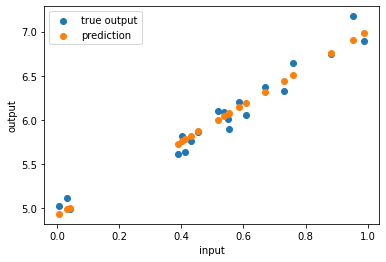

In [18]:
# dataset1 = 랜덤으로 생성한 데이터, 입력 = 1차원, 출력 = 1차원

import numpy as np
import matplotlib.pyplot as plt

N = 20 # sample의 개수
x = np.random.rand(N,1) # [0, 1] 사이의 실수를 랜덤으로 N개 생성
y = 5 + 2*x + 1e-1*np.random.randn(N,1) # N(0, 1)을 그대로 넣지 말고 1/10으로 줄여서


# design matrix, bias 없음
# X = x

# design matrix, bias 포함
X = np.hstack([np.ones((N,1)), x])
print(X)

# normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # (X^T * X)^{-1} X^T y

y_pred = X.dot(theta)
SSE = np.sum((y - y_pred)**2)

print(theta, SSE)


plt.figure()
plt.scatter(x,y)
plt.xlabel('input')
plt.ylabel('output')

plt.scatter(x,y_pred)
plt.legend(['true output','prediction'])

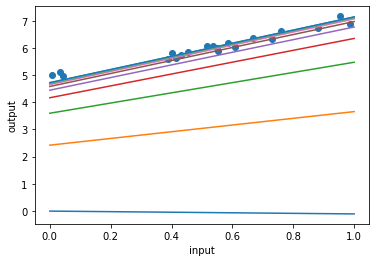

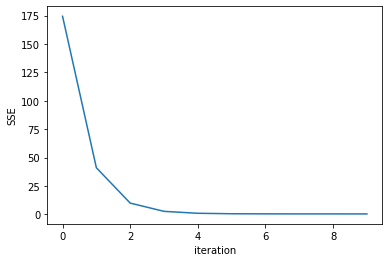

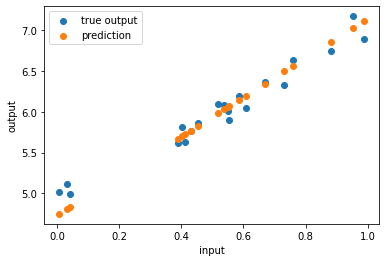

In [39]:
# batch gradient descent, bias 포함

eta = 0.01 # learning rate
maxIter = 10
theta = np.random.randn(2,1)

SSE = []

# plot을 위한 값들
x_new = np.linspace(0, 1, 10)
x_new = x_new.reshape(10,1)
X_new = np.hstack([np.ones((10,1)), x_new])
y_new = X_new.dot(theta)

plt.figure()
plt.scatter(x,y)
plt.xlabel('input')
plt.ylabel('output')
plt.plot(x_new, y_new)

for iter in range(maxIter):
    grad = X.T.dot(X.dot(theta) - y)
    theta = theta - 2*eta*grad
    
    y_pred = X.dot(theta)
    SSE.append(np.sum((y - y_pred)**2))
    
    # 그림 그리기, BGD 동작과는 아무 상관 없음
    y_new = X_new.dot(theta)
    plt.plot(x_new, y_new)
    
#     print('[iter %3d] SSE: %8.3f' % (iter, SSE[-1]))
    
plt.figure()
plt.plot(SSE)
plt.xlabel('iteration')
plt.ylabel('SSE')

plt.figure()
plt.scatter(x,y)
plt.xlabel('input')
plt.ylabel('output')

plt.scatter(x,y_pred)
plt.legend(['true output','prediction'])

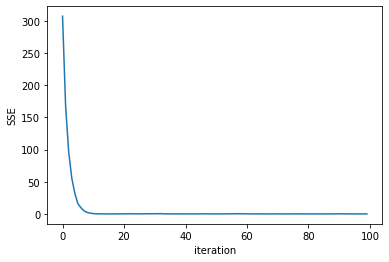

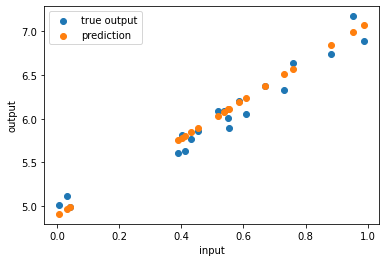

In [49]:
# stochastic gradient descent, bias 포함

eta = 0.1 # learning rate
maxIter = 100

# 초기값 설정
theta = np.random.randn(2,1)
y_pred = X.dot(theta)

SSE = []

# plot을 위한 값들
x_new = np.linspace(0, 1, 10)
x_new = x_new.reshape(10,1)
X_new = np.hstack([np.ones((10,1)), x_new])
y_new = X_new.dot(theta)

# plt.figure()
# # 데이터셋을 scatter로 그리고
# plt.scatter(x,y)
# plt.xlabel('input')
# plt.ylabel('output')
# # 범위 내 전체 입력(윗부분)에 대한 예측을 plot(선)으로 그림
# plt.plot(x_new, y_new)


for iter in range(maxIter):
    idn = np.random.randint(0, N, 1) # 랜덤으로 정수를 하나 뽑는데, (최소값, 최대값, shape)
    grad = -(y[idn,0] - y_pred[idn,0])*X[idn,:].reshape(2,1)
    theta = theta - 2*eta*grad
    
    # 업데이트된 theta로 주어진 입력에 대한 예측을 구함
    y_pred = X.dot(theta)
    # SSE를 구해서 한자리 추가함(append)
    SSE.append(np.sum((y - y_pred)**2))
    
    # plot(선) 그리기, BGD 동작과는 아무 상관 없음, iteration마다 어떻게 변하나 보려고
    y_new = X_new.dot(theta)
#     plt.plot(x_new, y_new)
    
#     print('[iter %3d] random sample: %2d, SSE: %8.3f' % (iter, idn, SSE[-1]))
    
plt.figure()
plt.plot(SSE)
plt.xlabel('iteration')
plt.ylabel('SSE')

plt.figure()
plt.scatter(x,y)
plt.xlabel('input')
plt.ylabel('output')

plt.scatter(x,y_pred)
plt.legend(['true output','prediction'])

# batch => (+) 부드럽게 해에 접근을 함, 전체 샘플에 대한 sum
#          (-) local minimum에 빠지면 나오기가 어려움
# stochastic => (-) 어떤 샘플이 뽑히는지에 따라서, grad의 방향이 변동이 큼, 불규칙하게 접근
#               (+) 변동성이 있다보니까 local에 빠져도 나올 여지가 높음

38 5
38 5


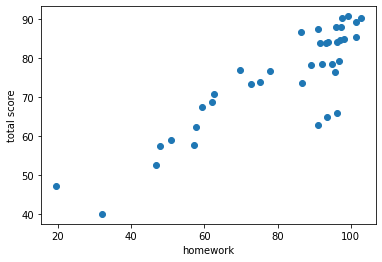

In [82]:
# dataset2 = 지난 학기 성적(익명, 노이즈), 입력 = 5차원, 출력 = 1차원
# 총점 = 출석 10% / 사전강의&퀴즈 15% / 과제 20% / 중간고사 25% / 기말고사 30%
# y = 0.10*data[:,1] + 0.15*data[:,2] + 0.20*data[:,3] + 0.25*data[:,4] + 0.30*data[:,5]

data = np.loadtxt("data.csv", delimiter = ",")

# design matrix, bias 없음
X = data[:,1:] # 입력 = 두번째열 ~ 끝열
y = data[:,0] # 출력 = 첫번째열
y = y.reshape(-1,1) # N x 1 행렬

N,M = X.shape
print(N,M)

plt.figure()
plt.scatter(X[:,2],y)
plt.xlabel('homework')
plt.ylabel('total score')

# # design matrix, bias 추가
# X = np.hstack([np.ones((N,1)), X])

N,M = X.shape
print(N,M)

27.252216972424193
[[0.07329246]
 [0.17379784]
 [0.18305024]
 [0.26649007]
 [0.3062968 ]]


Text(0, 0.5, 'prediction')

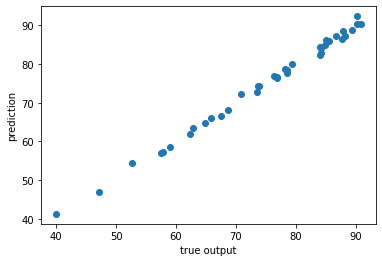

In [83]:
# normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_pred = X.dot(theta)
SSE = np.sum((y - y_pred)**2)
print(SSE)
print(theta)

plt.figure()
plt.scatter(y,y_pred)
plt.xlabel('true output')
plt.ylabel('prediction')

Text(0, 0.5, 'prediction')

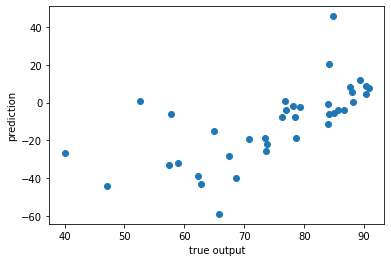

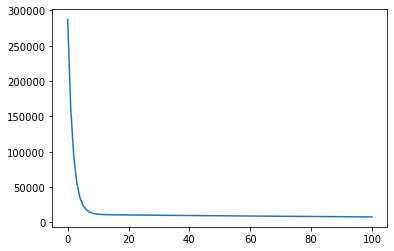

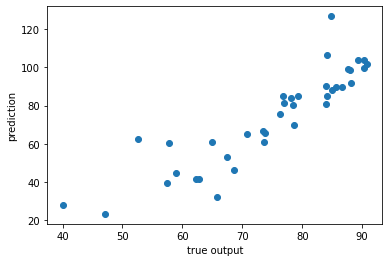

In [85]:
# batch gradient descent

theta = np.random.randn(M,1) # 초기 파라미터

eta = 0.0000001
maxIter = 100

y_pred = X.dot(theta)

SSE = []
SSE.append(np.sum((y - y_pred)**2))

plt.figure()
plt.scatter(y,y_pred)
plt.xlabel('true output')
plt.ylabel('prediction')

for iter in range(maxIter):
    grad = 2*X.T.dot(y_pred - y) # 2 X^T (X theta - y)
    theta = theta - eta*grad # gradient descent
    y_pred = X.dot(theta) # 주어진 input X에 대해서 전체 예측을 수행
    SSE.append(np.sum((y - y_pred)**2)) # SSE를 계산
    
plt.figure()
plt.plot(SSE)


plt.figure()
plt.scatter(y,y_pred)
plt.xlabel('true output')
plt.ylabel('prediction')

Text(0, 0.5, 'prediction')

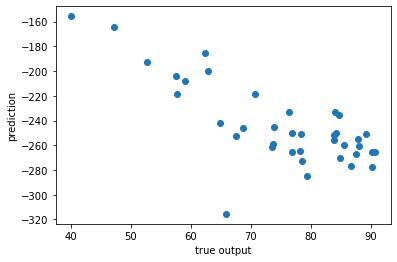

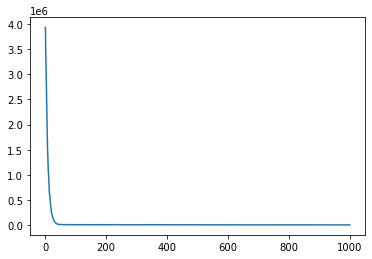

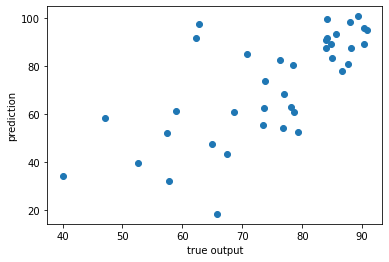

In [89]:
# stochastic gradient descent

theta = np.random.randn(M,1) # 초기 파라미터

eta = 0.000001
maxIter = 1000

y_pred = X.dot(theta)

SSE = []
SSE.append(np.sum((y - y_pred)**2))

plt.figure()
plt.scatter(y,y_pred)
plt.xlabel('true output')
plt.ylabel('prediction')

for iter in range(maxIter):
    idn = np.random.randint(0, N, 1) # 랜덤으로 샘플 하나의 인덱스를 추출
    grad = - 2*(y[idn,:] - y_pred[idn,:])*X[idn,:].reshape(M,1)
    theta = theta - eta*grad # gradient descent
    y_pred = X.dot(theta) # 주어진 input X에 대해서 전체 예측을 수행
    SSE.append(np.sum((y - y_pred)**2)) # SSE를 계산
    
plt.figure()
plt.plot(SSE)

plt.figure()
plt.scatter(y,y_pred)
plt.xlabel('true output')
plt.ylabel('prediction')